<a href="https://colab.research.google.com/github/rtrochepy/machine_learning/blob/main/PyTorch_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks Course with PyTorch**

**Instructor:** Omar Uriel Espejel Diaz

**Creating PyTorch Models**

Fundamentals of creating a PyTorch model, from creating an nn.Module object to model training and adding a loss function.

We'll start with a simple linear regression example to illustrate these concepts. By the end of this class, you will have a solid understanding of how PyTorch works and how to create and train your own models.

**Import libraries.**

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Comprobar la versión de PyTorch
torch.__version__

'2.0.1+cu118'

**Generate your data.**

For simplicity, in this example, we'll create synthetic data.

We create a one-dimensional tensor called "X" containing a range of values using the arange function. The input parameters "start," "end," and "step" specify the start, end, and step size of the range, respectively.

The **unsqueeze** function is used to add an additional dimension to the tensor, converting the one-dimensional tensor into a column tensor (with an additional dimension at the end).

In summary, this code creates a column tensor with a specified range of values.

In [2]:
# Crea *nuevos* parámetros
volumen = 0.8
sesgo = 0.2

# Crea datos
inicio = 0
final = 1
step = 0.025
X = torch.arange(inicio, final, step).unsqueeze(dim=1)
print(f"Shape de X: {X.shape}")
y = volumen * X + sesgo
print(f"Shape de y: {y.shape}")

X[:10], y[:10]

Shape de X: torch.Size([40, 1])
Shape de y: torch.Size([40, 1])


(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

We need a **training set** and a **test set**.

Each set serves a specific purpose:

**Test set:** The model is evaluated with this data to test what it has learned.

**Training set:** The model learns from this data.

In [3]:
# Crea la división

train_division = int(0.7 * len(X)) # 70% de los datos utilizados para el conjunto de entrenamiento, 30% para pruebas
X_ent, y_ent = X[:train_division], y[:train_division]
X_prueb, y_prueb = X[train_division:], y[train_division:]

In [4]:
len(X_ent), len(X_prueb)

(28, 12)

We have 28 samples for training (**X_train** and **y_train**) and 12 test samples (**X_test** and **y_test**).

Let's visualize our data.

In [5]:
def plot_predictions(datos_ent=X_ent,
                     etiq_ent=y_ent,
                     datos_prueba=X_prueb,
                     etiq_prueba=y_prueb,
                     predictions=None):
  """
  Traza datos de entrenamiento, datos de prueba y compara predicciones
  """
  plt.figure(figsize=(10, 10))

  # Traza datos de entrenamiento en verde
  plt.scatter(datos_ent, etiq_ent, c="g", s=6, label="Datos de entrenamiento")

  # Traza datos de prueba en amarillo
  plt.scatter(datos_prueba, etiq_prueba, c="y", s=6, label="Datos de prueba")

  if predictions is not None:
    # Traza las predicciones en rojo
    plt.scatter(datos_prueba, predictions, c="r", s=6, label="Predicciones")

  # Leyenda
  plt.legend(prop={"size": 12});

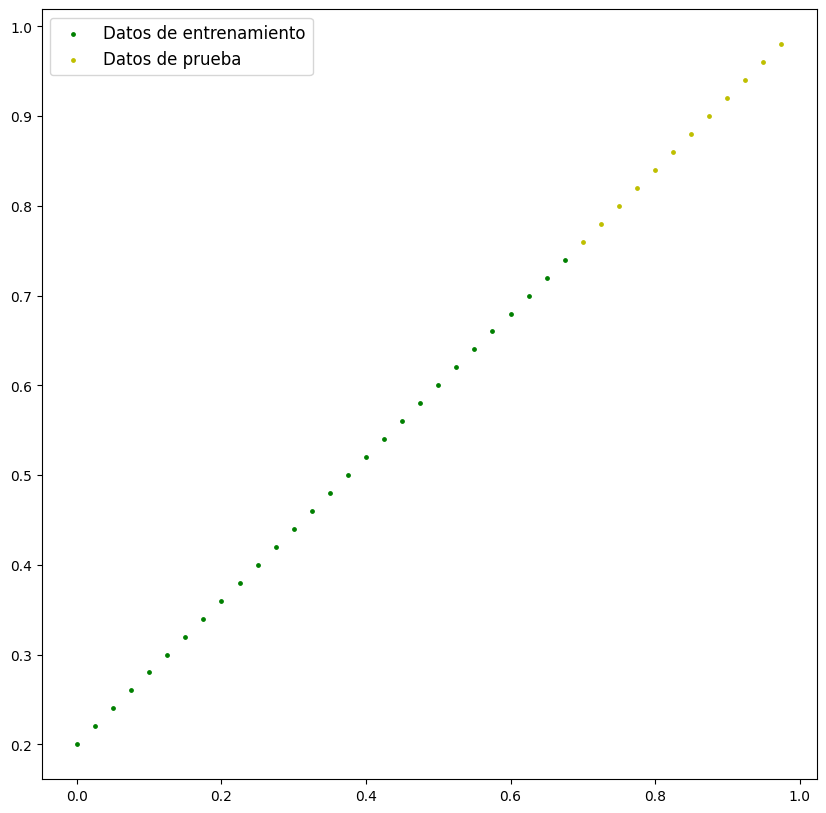

In [6]:
plot_predictions();

**Now we can visualize our data on a straight line!**

**2. Structure of a PyTorch model.**

Let's build a linear regression model using PyTorch.

**torch.nn** provides tools for building neural networks, **torch.optim** for optimizing models, **data.Dataset** for handling datasets, and **torch.utils.data**.DataLoader for loading and transforming data. These tools are fundamental for building and training machine learning models.

**torch.nn:** This module provides classes and functions for building neural networks. It contains a variety of layers such as convolutional layers, pooling layers, normalization layers, recurrent layers, and fully connected layers, which can be combined to build various neural network architectures.

**torch.optim:** This module provides classes and functions for optimizing machine learning models. It includes a variety of optimization algorithms like SGD, Adam, Adagrad, and Adadelta, which are used to adjust the model parameters during training.

**torch.utils.data.Dataset:** This class is used to represent machine learning datasets. It provides a consistent interface for accessing data and its labels. It can be customized to work with datasets of different formats and types.

**torch.utils.data.DataLoader:** This class is used to load and transform data from a dataset into batches for model training. It handles batch assignment, data shuffling, and loading data to the GPU if necessary, making it easier to process large datasets.

For now, we will use the first two modules. In the final project, we will use DataLoader.

The following code defines a class called **LinearRegressionModel** that inherits from the **nn.Module** class in PyTorch.

The class has two adjustable parameters (**weight** and **bias**) that are initialized with random values and can be optimized during training.

The **forward** function performs the model computation, where the input tensor x is multiplied by the weight parameter and added to the **bias** parameter.

In summary, this code defines a linear regression model class with two adjustable parameters and defines the model computation operation. This serves as a template for defining and training linear regression models in PyTorch.

In [7]:
# Crea una clase de modelo de regresión lineal
class ModeloRegresionLineal(nn.Module):
  def __init__(self):
    super().__init__()
    self.volumen = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.sesgo = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

# Define el cálculo en el modelo
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.volumen * x + self.sesgo

**torch.manual_seed(42)** sets the seed of the random number generator to 42. This means that the same random numbers will be generated in each execution of the code using PyTorch tensors.

This can be useful for reproducing results and ensuring the reproducibility of machine learning experiments.

In [8]:
torch.manual_seed(42)
# Crea un objeto instanciando la clase ModeloRegresionLineal

model_1 = ModeloRegresionLineal()

In [9]:
model_1

ModeloRegresionLineal()

**model_1.state_dict()** will return the dictionary containing the values of all trainable parameters of the model. This dictionary can be useful for saving and loading models.

In [10]:
model_1.state_dict()

OrderedDict([('volumen', tensor([0.3367])), ('sesgo', tensor([0.1288]))])

The values of the **weight** and **bias** variables appear as random tensors.

We start with random parameters and then update the model towards parameters that better fit our data.

**Predictions using torch.inference_mode()**

To make predictions with **torch.inference_mode()**, we can pass the test data X_test to see how close they are to y_test.

When we pass data to the model, it goes through **forward()** and produces a result based on the computation we defined earlier.

In [11]:
# Hacer predicciones con el modelo
with torch.inference_mode():
  y_predc = model_1(X_prueb)

**torch.inference_mode** is used for inference (predictions). It also disables some options like gradient tracking (necessary for training, NOT for inference).

In [12]:
# Comprueba las predicciones
y_predc

tensor([[0.3645],
        [0.3729],
        [0.3813],
        [0.3897],
        [0.3982],
        [0.4066],
        [0.4150],
        [0.4234],
        [0.4318],
        [0.4402],
        [0.4487],
        [0.4571]])

There is one prediction value per test sample due to the implemented data type.

In this case, for a straight line, one value **X** is mapped to one value **y**. However, machine learning models are very flexible. We can map 80 values of **X** to 10 values of **y**.

Let's visualize our data using **plot_predictions()**.

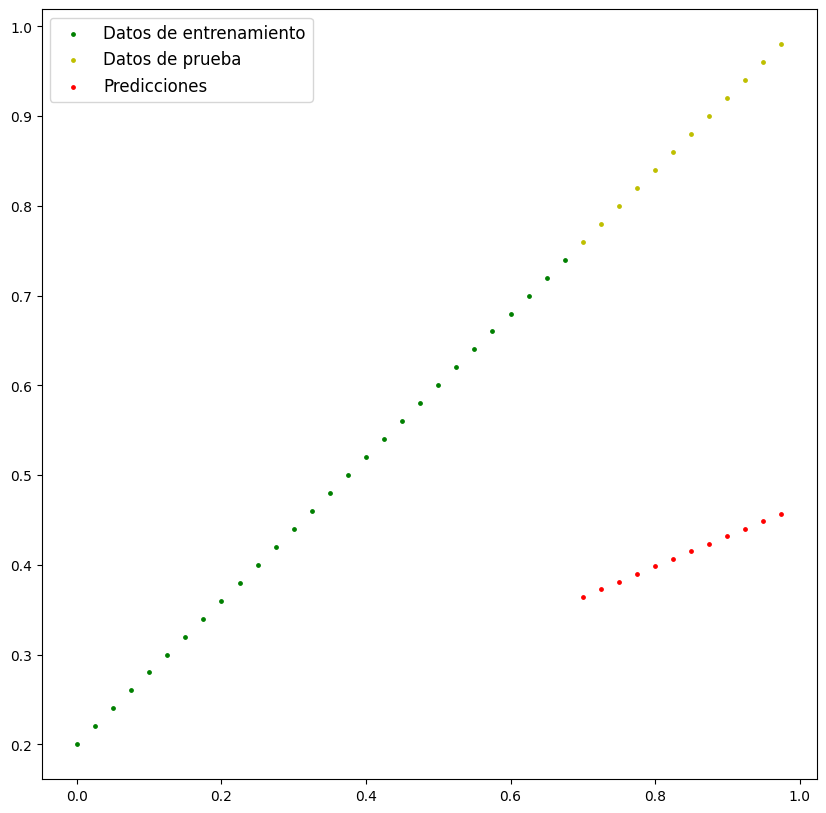

In [13]:
plot_predictions(predictions=y_predc)

Remember that our model only uses random parameters to make predictions, essentially guessing. **That's why the prediction looks inaccurate**.

**3. Applying loss function and optimizers in PyTorch.**

**To fix the random parameter values of the model, we can update the internal parameters of the # weight and # bias variables to better represent the data.**

For this, we'll create a **loss function** and an **optimizer** with PyTorch.

The **loss function** measures how wrong the model predictions **y_pred** are compared to the labels **         **. PyTorch has many built-in loss functions in torch.nn.

The **optimizer** tells the models how to update their internal parameters to minimize the loss. We can find various implementations in **torch.optim**.

Depending on the type of problem we are working on, we will use a specific loss function and optimization.

For our problem, we will use **Mean Absolute Error (MAE)** as the loss function (**torch.nn.L1Loss**) to measure the absolute difference between two points and take the mean over all examples.

We will also use **Stochastic Gradient Descent (SGD)** (**torch.optim.SGD(params, lr)**) as our optimizer, where params are the model parameters (weight and bias), and lr is the learning rate at which the optimizer updates the parameters.

Additionally, we arbitrarily set a learning rate of 0.01.

In [14]:
# Crea función de pérdida
fn_perd = torch.nn.L1Loss()

# Crea el optimizador
optimizador = torch.optim.SGD(params=model_1.parameters(), lr=0.01)  # tasa de aprendizaje (cuánto debe cambiar el optimizador de parámetros en cada paso, más alto = más (menos estable), más bajo = menos (puede llevar mucho tiempo))

In [15]:
fn_perd

L1Loss()

Now that we have a loss function and an optimizer, let's create a training loop and a test loop. This involves the model going through the training data and learning the relationship between **features** and **labels**.

The test loop involves checking the test data and evaluating how well the model learned patterns from the training data.

**For training, we'll write a Python for loop.**

**Training loop steps:**

1. The model goes through all the training data again, performing its computations in the **forward()** functions. Code: **model(X_train)**.

2. The predictions are compared and evaluated to see how wrong they are. Code: **loss = loss_fn(y_pred, y_train)**.

3. The optimizer gradients are set to zero so they can be recalculated and used for specific training. Code: **optimizer.zero_grad()**.

4. The gradient of the loss with respect to each parameter to be updated is calculated (backpropagation). Code: **loss.backward()**.

5. The parameters are updated with **requires_grad=True** with respect to the loss to improve them. Code: **optimizer.step()**.

In [16]:
torch.manual_seed(42)

# Establezca cuántas veces el modelo pasará por los datos de entrenamiento
epocas = 100

# Cree listas de vacías para realizar un seguimiento de nuestro modelo
entrenamiento_loss = []
test_loss = []

for epoca in range(epocas):
    ### Entrenamiento

    # Pon el modelo en modo entrenamiento
    model_1.train()

    # 1. Pase hacia adelante los datos usando el método forward()
    y_predc = model_1(X_ent)

    # 2. Calcula la pérdida (Cuán diferentes son las predicciones de nuestros modelos)
    perdida = fn_perd(y_predc, y_ent)

    # 3. Gradiente cero del optomizador
    optimizador.zero_grad()

    # 4. Pérdida al revés
    perdida.backward()

    # 5. Progreso del optimizador
    optimizador.step()

    ### Función de prueba

    # Pon el modelo en modo evaluación
    model_1.eval()

    with torch.inference_mode():

      # 1. Reenviar datos de prueba
      prueba_predc = model_1(X_prueb)

      # 2. Calcular la pérdida en datos de prueba
      prueb_perd = fn_perd(prueba_predc, y_prueb.type(torch.float))

      # Imprime lo que está pasando
      if epoca % 10 == 0:
        entrenamiento_loss.append(perdida.detach().numpy())
        test_loss.append(prueb_perd.detach().numpy())
        print(f"Epoca: {epoca} | Entrenamiento pérdida: {perdida} | Test pérdida {prueb_perd}")

Epoca: 0 | Entrenamiento pérdida: 0.22755758464336395 | Test pérdida 0.44638586044311523
Epoca: 10 | Entrenamiento pérdida: 0.1217288002371788 | Test pérdida 0.32246577739715576
Epoca: 20 | Entrenamiento pérdida: 0.07873930037021637 | Test pérdida 0.24351508915424347
Epoca: 30 | Entrenamiento pérdida: 0.06662709265947342 | Test pérdida 0.20124231278896332
Epoca: 40 | Entrenamiento pérdida: 0.06196669116616249 | Test pérdida 0.1784226894378662
Epoca: 50 | Entrenamiento pérdida: 0.05890420451760292 | Test pérdida 0.1637665033340454
Epoca: 60 | Entrenamiento pérdida: 0.056116510182619095 | Test pérdida 0.15557575225830078
Epoca: 70 | Entrenamiento pérdida: 0.053391676396131516 | Test pérdida 0.14738501608371735
Epoca: 80 | Entrenamiento pérdida: 0.05066370964050293 | Test pérdida 0.14011786878108978
Epoca: 90 | Entrenamiento pérdida: 0.047930534929037094 | Test pérdida 0.1328507363796234


**It seems that our loss decreased with each epoch; let's see it graphically.**

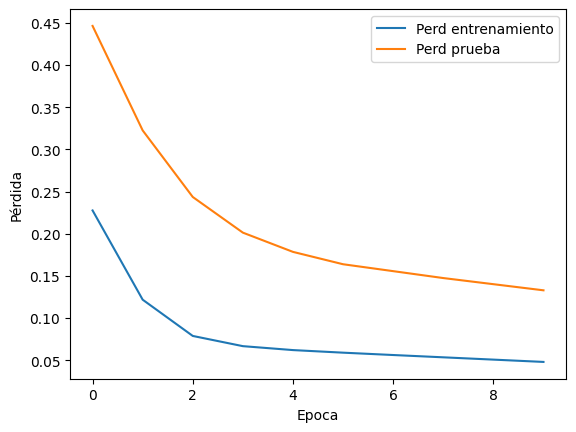

In [17]:
# Traza las curvas de pérdida
plt.plot(entrenamiento_loss, label="Perd entrenamiento")
plt.plot(test_loss, label="Perd prueba")
plt.ylabel("Pérdida")
plt.xlabel("Epoca")
plt.legend()

**4. Inference with a trained PyTorch model.**

**Once the model is trained, we can make inferences (predictions) with it.**

There are three aspects we need to remember to make predictions correctly:

1. Set the model to evaluation mode **(model.eval()**).

2. Make predictions using the inference mode context manager (with **torch.inference_mode()**: ...).

3. All predictions must be done with objects on the same device (data and model either on GPU or CPU).

In [18]:
# 1. Configura el modelo en modo de evaluación
model_1.eval()

# 2. Configura el administrador de contexto del modo de inferencia
with torch.inference_mode():

# 3. Asegúrate de que los cálculos se realicen con el modelo y los datos en el mismo dispositivo en nuestro caso, nuestros datos y modelo están en la CPU de forma predeterminada
  # model_1.to(device)
  # X_prueb = X_prueb.to(device)
  y_predc = model_1(X_prueb)

In [19]:
y_predc

tensor([[0.6694],
        [0.6829],
        [0.6965],
        [0.7100],
        [0.7236],
        [0.7371],
        [0.7506],
        [0.7642],
        [0.7777],
        [0.7913],
        [0.8048],
        [0.8184]])

Observe how the trained model looks graphically:

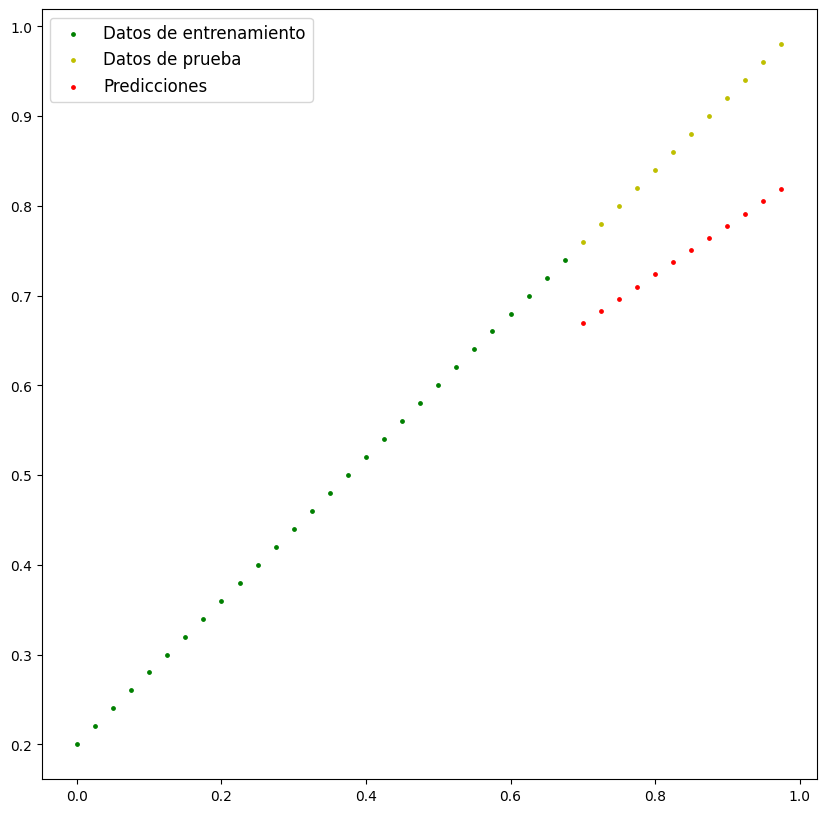

In [20]:
plot_predictions(predictions=y_predc)

Graphically, the red dots look much closer to where they were before.

**Summary:**

In this tutorial, we covered the fundamentals of creating PyTorch models for machine learning tasks, using a simple linear regression example as illustration. The key points covered are as follows:

**Data Generation:** We generated synthetic data for our example using PyTorch tensors and visualized it on a straight line.

**PyTorch Model Structure:** We introduced the essential modules of PyTorch, such as torch.nn and torch.optim, and explained their roles in building neural networks and optimizing models. We also defined a linear regression model class, inheriting from nn.Module, and implemented the forward computation function.

**Loss Function and Optimizer:** We addressed the need to optimize the random parameters of the model by introducing the concept of loss functions and optimizers. We chose Mean Absolute Error (MAE) as the loss function and Stochastic Gradient Descent (SGD) as the optimizer for our linear regression model.

**Training Loop:** We described the steps involved in the training loop, including forward computation, calculating loss, computing gradients, and updating parameters. We observed how the loss decreased with each epoch, indicating the model's improvement.

**Inference:** Once the model was trained, we explored how to perform inference (predictions) using the trained model. We emphasized the importance of setting the model to evaluation mode and ensuring all data and model objects are on the same device (GPU or CPU) during inference.

In conclusion, this tutorial provided a foundational understanding of creating PyTorch models, training them using loss functions and optimizers, and making predictions. It serves as a stepping stone for further exploration into more complex machine learning models and tasks using PyTorch. By applying these concepts, researchers and practitioners can build and train powerful machine learning models tailored to their specific applications.